## 2.1 张量
`torch.Tensor`是存储和变换数据的主要工具  
`Tensor`提供GPU计算和自动求梯度等更多功能，这些使 `Tensor`这一数据类型更加适合深度学习

### 2.1.2 创建tensor

In [18]:
# 通过torch.rand()的方法，构造一个随机初始化的矩阵
import torch
x = torch.rand(4, 3)
print(x)

tensor([[0.3670, 0.5447, 0.1429],
        [0.9500, 0.3365, 0.9109],
        [0.7558, 0.5330, 0.1936],
        [0.9774, 0.5942, 0.5098]])


In [19]:
# 通过torch.zeros()构造一个矩阵全为 0，并且通过dtype设置数据类型为 long。除此以外，我们还可以通过torch.zero_()和torch.zeros_like()将现有矩阵转换为全0矩阵
import torch
x = torch.zeros(4, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [20]:
# 通过torch.tensor()直接使用数据，构造一个张量
import torch
x = torch.tensor([5.5, 3]) 
print(x)

tensor([5.5000, 3.0000])


In [21]:
# 基于已经存在的 tensor，创建一个 tensor
x = x.new_ones(4, 3, dtype=torch.double) 
# 创建一个新的全1矩阵tensor，返回的tensor默认具有相同的torch.dtype和torch.device
# 也可以像之前的写法 x = torch.ones(4, 3, dtype=torch.double)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [22]:
x = torch.randn_like(x, dtype=torch.float)
# 重置数据类型
print(x)
# 结果会有一样的size
# 获取它的维度信息
print(x.size())
print(x.shape)

# 返回的torch.Size其实是一个tuple，⽀持所有tuple的操作。我们可以使用索引操作取得张量的长、宽等数据维度

tensor([[ 0.8245,  0.0343,  0.5410],
        [ 0.1090, -0.2235, -0.1592],
        [ 0.3809,  0.8059,  0.0696],
        [ 0.3689, -1.2402,  0.4619]])
torch.Size([4, 3])
torch.Size([4, 3])


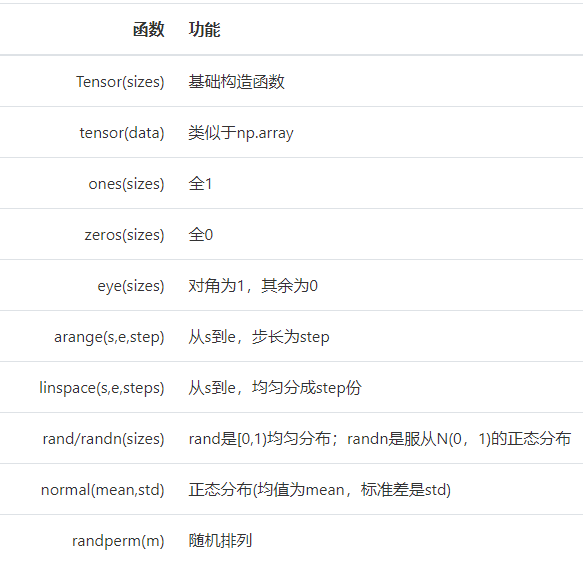

### 2.1.3 张量的操作

### 加法操作

In [23]:
# 方式1
y = torch.rand(4, 3)
print(x + y)

tensor([[ 1.8226,  0.9196,  1.5369],
        [ 0.9898,  0.6935,  0.0925],
        [ 0.6951,  1.0436,  0.9227],
        [ 0.4760, -1.0298,  1.1075]])


In [24]:
# 方式2
print(torch.add(x, y))

tensor([[ 1.8226,  0.9196,  1.5369],
        [ 0.9898,  0.6935,  0.0925],
        [ 0.6951,  1.0436,  0.9227],
        [ 0.4760, -1.0298,  1.1075]])


In [25]:
# 方式3 in-place，原值修改
y.add_(x)
print(y)

tensor([[ 1.8226,  0.9196,  1.5369],
        [ 0.9898,  0.6935,  0.0925],
        [ 0.6951,  1.0436,  0.9227],
        [ 0.4760, -1.0298,  1.1075]])


### 索引操作
需要注意的是：索引出来的结果与原数据共享内存，修改一个，另一个会跟着修改。如果不想修改，可以考虑使用copy()等方法

In [26]:
import torch
x = torch.rand(4,3)
# 取第二列
print(x[:, 1]) 

tensor([0.7847, 0.0367, 0.9631, 0.7580])


In [27]:
y = x[0,:]
y += 1
print(y)
print(x[0, :]) # 源tensor也被改了了

tensor([1.3189, 1.7847, 1.6557])
tensor([1.3189, 1.7847, 1.6557])


### 维度变换
张量的维度变换常见的方法有  
torch.view()  
torch.reshape()

In [28]:
# torch.view()
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8) # -1是指这一维的维数由其他维度决定
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


注: torch.view() 返回的新tensor与源tensor共享内存(其实是同一个tensor)，更改其中的一个，另外一个也会跟着改变。(顾名思义，view()仅仅是改变了对这个张量的观察角度)

In [29]:
x += 1
print(x)
print(y) # 也加了了1

tensor([[ 0.4541, -1.1494,  0.8304, -0.5148],
        [-0.5220,  0.4143, -0.4297, -0.3037],
        [ 1.6157,  0.7949,  2.9527,  1.0500],
        [ 0.3563,  1.0999,  1.0457,  0.7924]])
tensor([ 0.4541, -1.1494,  0.8304, -0.5148, -0.5220,  0.4143, -0.4297, -0.3037,
         1.6157,  0.7949,  2.9527,  1.0500,  0.3563,  1.0999,  1.0457,  0.7924])


torch.reshape()可以改变张量的形状，但是此函数并不能保证返回的是其拷贝值，所以官方不推荐使用。推荐的方法是我们先用clone()创造一个张量副本然后再使用torch.view()进行函数维度变换  
注：使用 clone() 还有一个好处是会被记录在计算图中，即梯度回传到副本时也会传到源 Tensor 

### 取值操作  
如果我们有一个元素 tensor ，我们可以使用 .item() 来获得这个 value，而不获得其他性质

In [30]:
x = torch.randn(1) 
print(type(x)) 
print(type(x.item()))

<class 'torch.Tensor'>
<class 'float'>


torch.tensor官方文档：https://pytorch.org/docs/stable/tensors.html

### 2.1.4 广播机制
当对两个形状不同的 Tensor 按元素运算时，可能会触发广播(broadcasting)机制：先适当复制元素使这两个 Tensor 形状相同后再按元素运算

In [31]:
x = torch.arange(1, 3).view(1, 2)
print(x)
y = torch.arange(1, 4).view(3, 1)
print(y)
print(x + y)

tensor([[1, 2]])
tensor([[1],
        [2],
        [3]])
tensor([[2, 3],
        [3, 4],
        [4, 5]])
